## ECS 171 Homework 1

Please explain your solutions clearly and include your entire computational work when needed. Should you include any code, please make sure to provide additional comments to explain your solution. Please put your work/solution for each question after the corresponding horizontal line in a separate coding or markdown box. Feel free to add coding or markdown boxes as you see fit. Usage of the numpy, pandas, seaborn, matplotlib and sklearn libraries are allowed.

### Question 1 (Outliers)- (5 points)
How does the presence of outliers influence the choice between using covariance and correlation to analyze the relationship between two variables in a dataset? Explain how each measure handles outliers differently and discuss the implications for interpreting their results in practical applications.
***

The presence of outliers influence the choice because covariance is the measure of relationship between two variables and how they change together. The outlier and the presence of it provides skewed data to the covariance which in turn gievs a skewed value for the value. 

Versus correlation which measures standard deviation in values, outliers are not as weighted in this method and have a lot less impact compared to covariance. 

### Question 2 (EDA)- (25 points)
The following code provides the distribution of the attributes of the breast cancer dataset from sklearn library. 


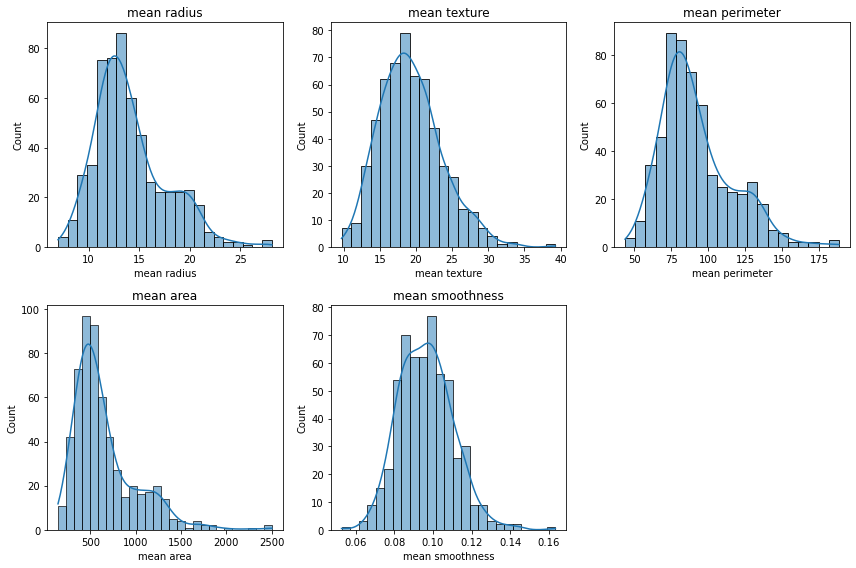


mean:
mean radius         14.127292
mean texture        19.289649
mean perimeter      91.969033
mean area          654.889104
mean smoothness      0.096360
dtype: float64 , 
median:
mean radius         13.37000
mean texture        18.84000
mean perimeter      86.24000
mean area          551.10000
mean smoothness      0.09587
dtype: float64 , 
std:
 mean radius          3.524049
mean texture         4.301036
mean perimeter      24.298981
mean area          351.914129
mean smoothness      0.014064
dtype: float64


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Plot histograms for some of the features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , df[features_to_plot].median(), df[features_to_plot].std()))

#### Question 2.1 - (10 points)
Analyze each plot and explain your observations regarding these attributes in terms of data skewness (for instance, is the data symmetric, if not is it right/left skewed? Why and how do you identify the skewness by using the parameters of the distributions such as mean, median, standard deviation?) Provide a complete analysis and incude any supporting explanation/computation if relevant.
***

The first plot has a mean of 14.12 and a median of 13.37 and this means that the variation is right skewed and the tail is seen there too
The second plot has a mean of 19.28 and a median of 18.8, the median ~ the means so it is symmetric 
The third plot has a mean of 86 and a median of 86, the mean > median so it is right skewed
The fourth plot has a mean of 654 and a median of 551, mean > median so it is rigth skewed
Finally the fifth plot has a mean of 0.09 ~ 0.09, meaning symnmetricy. 

#### Question 2.2 - (5 points)
Explain and compare the parameters and output of Z-score and Min-Max data transformation techniques. 
***

For Z-Score the paramters are mu and sigma which are the mean and standard deviation respectively while the min max have the min and max values of the respective feature. 

#### Question 2.3 - (5 points)
Apply the Z-score normalization technique on the dataset. You can either develop the normalization function from scratch, or use sklearn.preprocessing to make function calls to perform the transformation. After data normalization, visualize the normalized attriubutes (note: don't normalize the output variable - apply normalization on these attributes: 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'). Compare the data before and after normalization. What changes you see in the data? 
***

   mean radius  mean texture  mean perimeter  mean area  mean smoothness
0     1.096100     -2.071512        1.268817   0.983510         1.567087
1     1.828212     -0.353322        1.684473   1.907030        -0.826235
2     1.578499      0.455786        1.565126   1.557513         0.941382
3    -0.768233      0.253509       -0.592166  -0.763792         3.280667
4     1.748758     -1.150804        1.775011   1.824624         0.280125


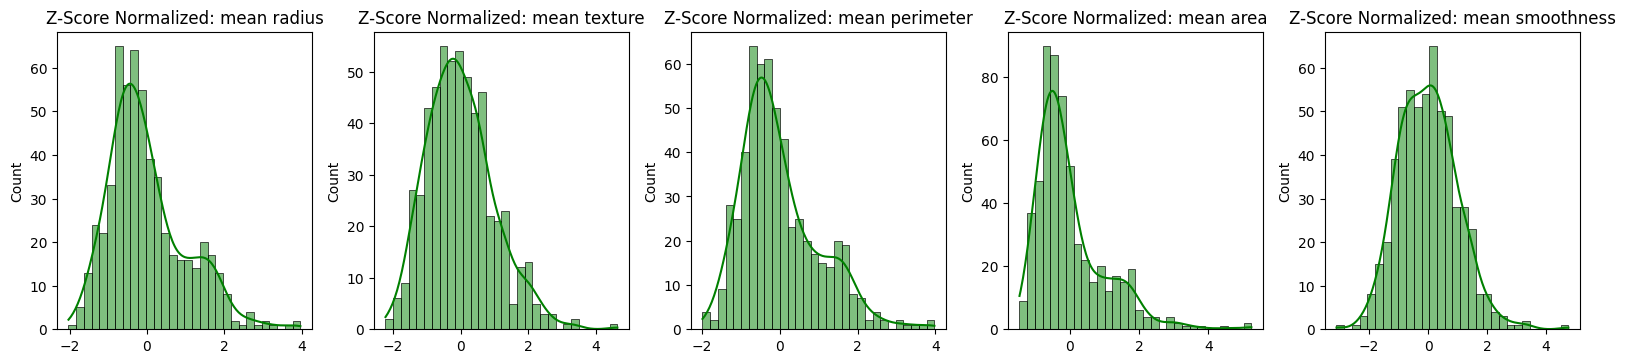

In [3]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns


data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']


mean = df[columns].mean()
std = df[columns].std()

# Apply Z-score normalization
z_score_df = (df[columns] - mean) / std


print(z_score_df.head())


plt.figure(figsize=(16, 10))


for i, col in enumerate(columns):
    plt.subplot(3, 5, i+6)
    sns.histplot(z_score_df[col], kde=True, bins=30, color='green')
    plt.title(f'Z-Score Normalized: {col}')
    plt.xlabel("")

plt.tight_layout()
plt.show()


The plots of all of the data are right skewed.

#### Question 2.4 - (5 points)
Find the outliers in the data (for the identified attributes) if any, by computing the interquartile ranges for Q1, Q2, Q3, IQR, min and max. Also visualize the outliers if any. 
***

   mean radius  mean texture  mean perimeter  mean area  mean smoothness
0     1.096100     -2.071512        1.268817   0.983510         1.567087
1     1.828212     -0.353322        1.684473   1.907030        -0.826235
2     1.578499      0.455786        1.565126   1.557513         0.941382
3    -0.768233      0.253509       -0.592166  -0.763792         3.280667
4     1.748758     -1.150804        1.775011   1.824624         0.280125
mean radius — Outliers: 14, Lower Bound: 5.58, Upper Bound: 21.90
mean texture — Outliers: 7, Lower Bound: 7.73, Upper Bound: 30.24
mean perimeter — Outliers: 13, Lower Bound: 31.78, Upper Bound: 147.49
mean area — Outliers: 25, Lower Bound: -123.30, Upper Bound: 1326.30
mean smoothness — Outliers: 6, Lower Bound: 0.06, Upper Bound: 0.13


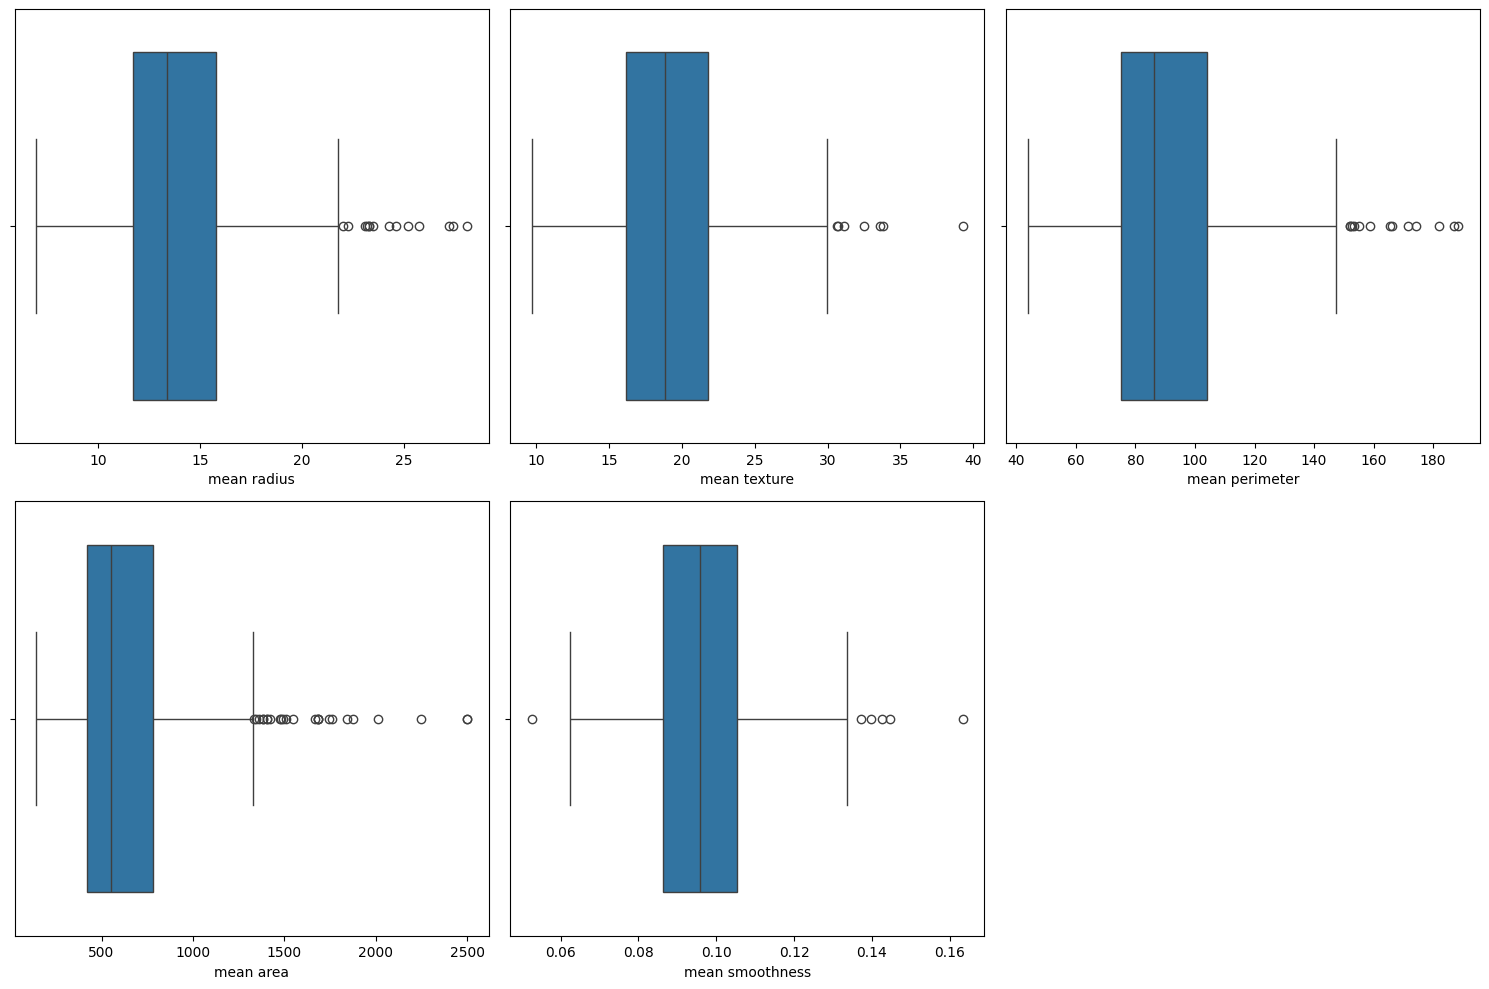

In [4]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns


data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']


mean = df[columns].mean()
std = df[columns].std()

# Apply Z-score normalization
z_score_df = (df[columns] - mean) / std


print(z_score_df.head())
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


plt.figure(figsize=(15, 10))
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    outliers, lb, ub = detect_outliers_iqr(df, col)
    print(f'{col} — Outliers: {len(outliers)}, Lower Bound: {lb:.2f}, Upper Bound: {ub:.2f}')
plt.tight_layout()
plt.show()


### Question 3 (Linear Regression) - (20 points)
For this question, use the [California House Prices dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from sklearn. The goal is to develop a linear regression model to predict the target variable (MedHouseVal) which represents the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). Note that the precision of changes to look for in this dataset may be relatively small so keep an eye out for smaller changes in the difference between models - in the range of around 2 percent or more between models.

#### Question 3.1 - (5 points)
Split your data into train and test sets by [80:20] rate (80\% for training and 20\% for testing). Initialize a LinearRegression model using the LinearRegression algorithm in sklearn. Evaluate the performance of the model on the test data by reporting MSE and R2 values (you can call the existing functions in sklearn to report MSE and R2, or you can develop these techniques from scratch). Visualize the relatioship between y and y_hat in test data (see the example plot covered during lecture).
***

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


housing = fetch_california_housing()
X, y = housing.data, housing.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Question 3.1 - MSE: {mse:.4f}, R2: {r2:.4f}")


plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual y")
plt.ylabel("Predicted y_hat")
plt.title("y vs y_hat (Test Data)")
plt.grid(True)
plt.show()


#### Question 3.2 - (5 points)
Repeat 3.1 using the normalized features to train your model (use z-score). Compare your findings from 3.1 and 3.2 and report any observations. 
***

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)


y_pred_n = model_n.predict(X_test_n)


mse_n = mean_squared_error(y_test_n, y_pred_n)
r2_n = r2_score(y_test_n, y_pred_n)



Slight changes in MSE and cost function values 

#### Question 3.3 - (10 points)
Implement cross validation method (from scratch), and apply 12-fold cross validation on your model to enhance the fit of your model. Report the mean of the R2 and MSE scores as the mse and R2 of the best model. Print the coefficients (i.e., weights) of the best model and explain what do you consider to be the best model. 
***

In [ ]:
from sklearn.model_selection import KFold
import numpy as np


kf = KFold(n_splits=12, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []
coefs = []

for train_index, test_index in kf.split(X_scaled):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)

    mse_scores.append(mean_squared_error(y_test_fold, y_pred_fold))
    r2_scores.append(r2_score(y_test_fold, y_pred_fold))
    coefs.append(model.coef_)


mean_mse = np.mean(mse_scores)
mean_r2 = np.mean(r2_scores)
best_index = np.argmax(r2_scores)

print(f"Question 3.3 - Mean MSE: {mean_mse:.4f}, Mean R2: {mean_r2:.4f}")
print(f"Best Fold R2: {r2_scores[best_index]:.4f}, Coefficients of Best Model:\n{coefs[best_index]}")


### Question 4- (20 points)
Answer the following questions:

#### Question 4.1 - (3 points)
What is the difference between Gradient Descent and Ordinary Lease Squares method? Explain the advantages and disadvantages of each approach.
***

The difference is in calculations of the coefficients. The OLS method calculates the coefficients of the linear regression model directly and isnt suitable for large datasets. While the gradient descent is not calculating coefficients and updates weight to achieve optimal model. 

#### Question 4.2 - (2 points)
How does a negative or positive gradient indicate the direction towards achieving a sub-optimal or optimal weight? Explain your answer.
***

The negative or positive gradient indicates the size of the steps it needs to take to achieve optimality as it indicates the loss function direction, the gradient uses this to minimize the loss. 

#### Question 4.3 - (10 points)
Provide the complete math for updating Wj associated with the jth attribute of a dataset using Gradient Descent weight update rule for finding the coefficients of a linear regression model. Use the Sum of Squared Residuals (SSR) as the loss (or cost) function to compute the gradient (i.e., weight change). Provide all the necessary details explaining the parameters used in your work.
***


w_j := w_j + \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} - \hat{y}^{(i)} \right) x_j^{(i)}


#### Question 4.4 - (5 points)
Explain the strategy in and the difference between stochastic gradient descent and batch-gradient descent algorithmically. 
***

Stochastic gradient uses the gradient descent weight update rule to minimize loss function while the Batch-gradient descent uses a batch of data points with average computed gradient to minimize loss function. 

### Question 5 (Stochastic Gradient Descent)- (10 points)
Use California House Prices dataset for this question.  
Use stochastic gradient descent approach to train a linear regression model using all the features of the dataset. After each epoch of training, record the MSE and R2 scores of the linear regression model on training data and test data. Run your solution for 100 epochs. Plot the recorded MSE-train[], MSE-test in one figure, and R2-train[], R2-test in another figure (over 100 epochs).  Annotate your code. Explain the details of your understanding of the code below the code or in the following markdown cell.
***

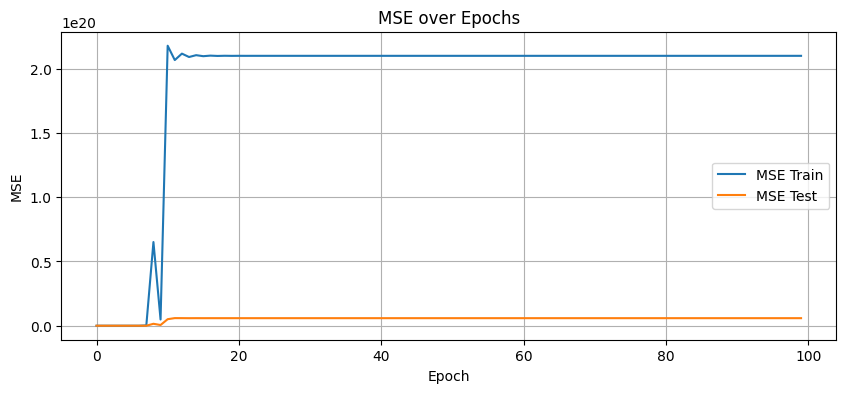

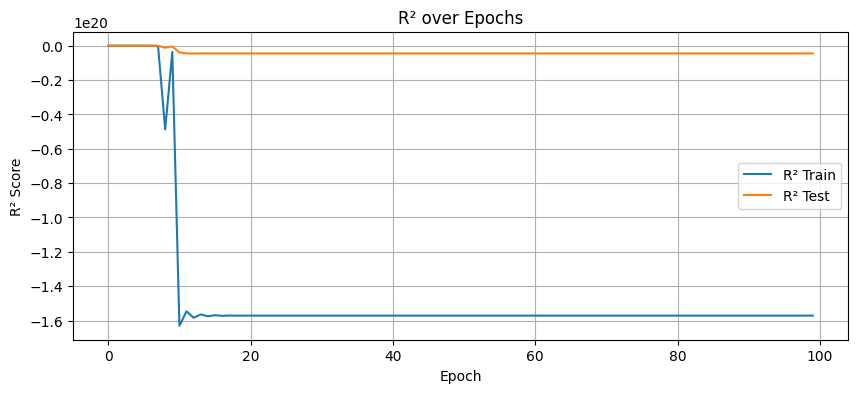

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SGDRegressor
sgd = SGDRegressor(max_iter=1, tol=None, learning_rate='invscaling', eta0=0.01, random_state=42, warm_start=True)

# Metrics per epoch
mse_train_list, mse_test_list = [], []
r2_train_list, r2_test_list = [], []

# Train for 100 epochs
for epoch in range(100):
    sgd.fit(X_train_scaled, y_train)
    
    y_train_pred = sgd.predict(X_train_scaled)
    y_test_pred = sgd.predict(X_test_scaled)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

# Plot MSE
plt.figure(figsize=(10, 4))
plt.plot(mse_train_list, label="MSE Train")
plt.plot(mse_test_list, label="MSE Test")
plt.title("MSE over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

# Plot R²
plt.figure(figsize=(10, 4))
plt.plot(r2_train_list, label="R² Train")
plt.plot(r2_test_list, label="R² Test")
plt.title("R² over Epochs")
plt.xlabel("Epoch")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()


This code uses stochastic gradient descent (SGD) to train a linear regression model on the California Housing dataset over 100 epochs. After each epoch, it records the training and test MSE and R² scores to track model performance. The results are plotted to visualize how error and accuracy evolve over time. And you can see the R^2 value stays relatively high while the MSE value stays low. 

### Question 6 (Ridge and Lasso Regression)- (8 points)


#### Question 6.1-(4 points)
Compare the cost functions in Ridge and Lasso Regression and indicate the regularization parameter.
***

- **Ridge Regression Cost Function**:
\[
J(w) = \text{RSS} + \lambda \sum_{j=1}^{n} w_j^2
\]
- **Lasso Regression Cost Function**:
\[
J(w) = \text{RSS} + \lambda \sum_{j=1}^{n} |w_j|
\]

- **λ (lambda)** is the regularization parameter. It controls the trade-off between fitting the data (RSS) and penalizing large coefficients.
- Ridge uses **L2 regularization** (squares), while Lasso uses **L1 regularization** (absolute values).


#### Question 6.2-(4 points) 
Explain which weights are more penalized in Ridge Regression and why (discuss your answer in the context of constraint satisfaction and take into account the constraint on Ridge Regression coefficients). 
***

In Ridge Regression, all weights are penalized proportionally to their size due to the L2 norm. Larger weights are penalized more heavily, but none are reduced exactly to zero, so all features remain in the model.

This contrasts with Lasso, which uses L1 regularization that can force some weights to zero, effectively performing feature selection.

Ridge favors models with small, distributed weights, making it suitable when many features are moderately important.


### Question 7 (MLE)- (12 points)
In the context of training a linear regression model using Maximum-Likelihood-Estimation, answer the following questions:


#### Question 7.1-(4 points) 
Indicate all assumptions discussed in the lecture under the MLE principle about the data, residual error, and the type of the probability density function used in the Likelihood function. 
***

Assumptions:
• 𝑥0 = 1
• 𝑥1 , 𝑥2 , ... , 𝑥m are the independent variables, and 𝑦 in the dependent variable.
• 𝜖 : residual error term, and 𝜖 ~𝑁(0, 𝜎 # ) where 𝜎 # is a constant, and 𝜖 is independent across
observations.
• Subsequently, variable 𝑦 is also independent across observations.

The distribution is a normal distribution.

#### Question 7.2-(4 points) 
Indicate the Likelihood function mathematically with respect to the assumptions made under MLE principle, and describe each term/parameters used in the likelihood function. 
***

The likelihood function under MLE for linear regression assumes normally distributed residuals:

\[
L = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - x_i^\top \theta)^2}{2\sigma^2}\right)
\]

- \( \theta \): model parameters (weights)  
- \( y_i \): actual output  
- \( \mathbf{x}_i^\top \theta \): predicted output  
- \( \sigma^2 \): variance of residuals  

Each term represents the probability of observing \( y_i \) given the prediction and Gaussian noise.


#### Question 7.3-(4 points) 
Explain how the concept of maximizing the likelihood of observing data under model parameters is convertible to minimizing the NLL? Discuss in terms of the mathematical notation and the shape of the function. 
***

Maximizing the likelihood is equivalent to minimizing the negative log-likelihood (NLL):

\[
\text{NLL} = \frac{n}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - x_i^\top \theta)^2
\]

Since \( \sigma^2 \) and constants don't affect optimization, minimizing the NLL reduces to minimizing the sum of squared errors. 